In [62]:
%matplotlib inline
import numpy as np
from utils.helper import read_data, blur, to_real, morphology
import matplotlib.pyplot as plt
FOLDER = "data/"
NUMBER_OF_RADARS = 3

In [63]:
data_empty = read_data(FOLDER + "empty.csv")
data_1p = read_data(FOLDER + "1p.csv")
data_2p = read_data(FOLDER + "2p.csv")
data_3p = read_data(FOLDER + "3p.csv")

In [64]:
data_empty_summed = to_real(np.sum(data_empty, axis=1)) 
data_1p_summed = to_real(np.sum(data_1p, axis=1))
data_2p_summed = to_real(np.sum(data_2p, axis=1))
data_3p_summed = to_real(np.sum(data_3p, axis=1))

/Users/kostiantynlavronenko/Desktop/Eestech/hackathon-milan/submission/code/utils/helper.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  return data_real.astype(float)


In [65]:
data_empty_summed[:, :, 32, :] = 0
data_1p_summed[:, :, 32, :] = 0
data_2p_summed[:, :, 32, :] = 0
data_3p_summed[:, :, 32, :] = 0
print(data_empty_summed.shape)
print(data_1p_summed.shape)
print(data_2p_summed.shape)
print(data_3p_summed.shape)


(40, 3, 64, 64)
(60, 3, 64, 64)
(60, 3, 64, 64)
(80, 3, 64, 64)


In [66]:
N_FRAME = 20
KERNEL_FACTOR = 3
SIGMA = 5
DISTANCE = 3
THRESHOLD = 45

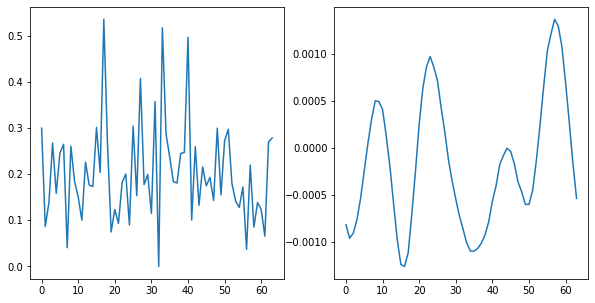

In [67]:
patch_to_plot = data_1p_summed[N_FRAME, 1, :, 2]
patch_filtered = filter_gaussdxdx(patch_to_plot, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
fig, axs = plt.subplots(1, 2, figsize = (10,5))
axs[0].plot(patch_to_plot)
axs[1].plot(patch_filtered)

In [68]:
from scipy import signal
from utils.helper import filter_gaussdxdx

frame = data_empty_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar = []
for i in range(NUMBER_OF_RADARS):
    for j in range(64):
        patch = frame[i,:,j]
        patch_filtered = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar.append(np.mean(peaks_n))
peaks_n = np.array(peaks_n)
print(peaks_n)
print(peaks_n_per_radar)
print(np.mean(peaks_n))

[1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 1 1 2 2 0 2 1 1 1 1 1 2 1 2 0 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 2 1 1 1 0 1 1 1 1 1 0 1 2 0 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 0 1 2 1 1 2 1 0 1 0 1 2 1 2 0 1 2 1 1 2 2 2 2 1 0 1 1 1 1 1 1 0 1 2 1
 1 1 0 2 0 1 1 1 1 1 1 1 0 1 1 2 1 1 3 1 3 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2
 1 1 2 1 1 1 1]
[1.140625, 1.0859375, 1.1197916666666667]
1.1197916666666667


In [69]:
frame = data_1p_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar = []
for i in range(NUMBER_OF_RADARS):
    for j in range(64):
        patch = frame[i,:,j]
        patch_filtered = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar.append(np.mean(peaks_n))
peaks_n = np.array(peaks_n)
print(peaks_n)
print(peaks_n_per_radar)
print(np.mean(peaks_n))

[1 1 1 1 1 3 1 1 1 1 1 1 1 0 0 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1
 2 1 1 1 2 1 2 2 1 1 0 2 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 2
 1 1 1 0 0 1 1 0 0 1 2 1 3 1 1 1 1 0 1 1 0 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2
 2 0 1 1 1 0 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 2 0 2 1 2 1 1 3 1 0 0 1 1 1 1 2
 2 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1 2 2
 2 2 1 2 1 1 0]
[1.140625, 1.0859375, 1.109375]
1.109375


In [70]:
frame = data_2p_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar = []
for i in range(NUMBER_OF_RADARS):
    for j in range(64):
        patch = frame[i,:,j]
        patch_filtered = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar.append(np.mean(peaks_n))
peaks_n = np.array(peaks_n)
print(peaks_n)
print(peaks_n_per_radar)
print(np.mean(peaks_n))

[1 1 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2
 2 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 1 2 3 1 2 0 1 3 2 2 1 1 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 1
 2 1 1 2 1 2 1 0 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 2 3 3 1 2 2 2 2 1 1 2 1 2 1 1 1 2 1 1 1 1 0
 0 1 2 1 2 1 1]
[1.28125, 1.2578125, 1.2760416666666667]
1.2760416666666667


In [71]:
frame = data_3p_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar = []
for i in range(NUMBER_OF_RADARS):
    for j in range(64):
        patch = frame[i,:,j]
        patch_filtered = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar.append(np.mean(peaks_n))
peaks_n = np.array(peaks_n)
print(peaks_n)
print(peaks_n_per_radar)
print(np.mean(peaks_n))

[1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 2 1 1 1 1 3 1 2 1 1 1 2 1 3 1 2 1 1 1 1 2 3 1 2 1 2 0 2 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 1 2 1 1 1 2 2 1 0 1 2 1 1 2 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 2 2 1 1 1 2 2]
[1.265625, 1.1953125, 1.1770833333333333]
1.1770833333333333
